### Project draft

Всі графіки по стилях, кольорах і оформленню ще поки не дуже готові, я більше звертала увагу на ідею, яку я хочу подати, які дані хочу на графіках подати

#### Підготовка даних

In [2]:
import pandas as pd
import altair as alt
import geopandas as gpd
import circlify
import matplotlib.pyplot as plt
from matplotlib_venn import venn2, venn2_circles
from matplotlib_venn import venn3, venn3_circles
from matplotlib import pyplot as plt

In [3]:
languages_main = gpd.read_file('language.csv')
languages_main.head()

,wals_code,iso_code,glottocode,Name,latitude,longitude,genus,family,macroarea,countrycodes,...,136B M in First Person Singular,109B Other Roles of Applied Objects,10B Nasal Vowels in West Africa,25B Zero Marking of A and P Arguments,21B Exponence of Tense-Aspect-Mood Inflection,108B Productivity of the Antipassive Construction,130B Cultural Categories of Languages with Identity of 'Finger' and 'Hand',58B Number of Possessive Nouns,79B Suppletion in Imperatives and Hortatives,geometry
0,aab,,,Arapesh (Abu),-3.45,142.95,Kombio-Arapesh,Torricelli,,PG,...,,,,,,,,,,None
1,aar,aiw,aari1239,Aari,6.0,36.5833333333,South Omotic,Afro-Asiatic,Africa,ET,...,,,,,,,,,,None
2,aba,aau,abau1245,Abau,-4.0,141.25,Upper Sepik,Sepik,Papunesia,PG,...,,,,,,,,,,None
3,abb,shu,chad1249,Arabic (Abbéché Chad),13.8333333333,20.8333333333,Semitic,Afro-Asiatic,Africa,TD,...,,,,,,,,,,None
4,abd,abi,abid1235,Abidji,5.66666666667,-4.58333333333,Kwa,Niger-Congo,Africa,CI,...,,,,,,,,,,None


In [4]:
data = {'language_name': languages_main["Name"],
        'country_code': languages_main["countrycodes"]
        }

languages_map = pd.DataFrame(data)
languages_map

,language_name,country_code
0,Arapesh (Abu),PG
1,Aari,ET
2,Abau,PG
3,Arabic (Abbéché Chad),TD
4,Abidji,CI
...,...,...
2674,Zapotec (Texmelucan),MX
2675,Zulu,ZA
2676,Zuni,US
2677,Zapotec (Yatzachi),MX


In [5]:
language_name = ['Arapesh (Abu)']
country_code = ['PG']
data = {'language_name': language_name,
         'country_code': country_code
        }

language_map_df = pd.DataFrame(data)

def split_coutry_codes(cd, lng, language_map_df):
    codes_list = cd.split(' ')
    for el in codes_list:
        dct = {'language_name': lng, 'country_code': el}
        language_map_df = language_map_df.append(dct, ignore_index = True)
    return language_map_df

for index, row in languages_map.iterrows():
    language_map_df = split_coutry_codes(row["country_code"], row["language_name"], language_map_df)
    
language_map_df

,language_name,country_code
0,Arapesh (Abu),PG
1,Arapesh (Abu),PG
2,Aari,ET
3,Abau,PG
4,Arabic (Abbéché Chad),TD
...,...,...
3042,Zapotec (Texmelucan),MX
3043,Zulu,ZA
3044,Zuni,US
3045,Zapotec (Yatzachi),MX


In [6]:
world = gpd.read_file('world-countries.json')
world.head()

,id,name,geometry
0,AFG,Afghanistan,"POLYGON ((61.21082 35.65007, 62.23065 35.27066..."
1,AGO,Angola,"MULTIPOLYGON (((16.32653 -5.87747, 16.57318 -6..."
2,ALB,Albania,"POLYGON ((20.59025 41.85540, 20.46317 41.51509..."
3,ARE,United Arab Emirates,"POLYGON ((51.57952 24.24550, 51.75744 24.29407..."
4,ARG,Argentina,"MULTIPOLYGON (((-65.50000 -55.20000, -66.45000..."


In [7]:
codes = gpd.read_file('country-codes.csv')
codes.drop(['geometry', 'numeric', 'country'], axis = 1, inplace = True)
codes = codes.rename(columns = {'alpha3': 'id', 'alpha2': 'country_code'}, inplace = False)
codes.head()

,country_code,id
0,AF,AFG
1,AL,ALB
2,DZ,DZA
3,AS,ASM
4,AD,AND


In [8]:
merged_codes = language_map_df.merge(codes)
merged_codes

,language_name,country_code,id
0,Arapesh (Abu),PG,PNG
1,Arapesh (Abu),PG,PNG
2,Abau,PG,PNG
3,Adzera,PG,PNG
4,Agarabi,PG,PNG
...,...,...,...
3016,Vedda,LK,LKA
3017,Slovak,SK,SVK
3018,Swati,SZ,SWZ
3019,Tokelauan,TK,TKL


In [9]:
df_language_country = world.merge(merged_codes)
df_language_country

,id,name,geometry,language_name,country_code
0,AFG,Afghanistan,"POLYGON ((61.21082 35.65007, 62.23065 35.27066...",Baluchi,AF
1,AFG,Afghanistan,"POLYGON ((61.21082 35.65007, 62.23065 35.27066...",Dari,AF
2,AFG,Afghanistan,"POLYGON ((61.21082 35.65007, 62.23065 35.27066...",Ishkashmi,AF
3,AFG,Afghanistan,"POLYGON ((61.21082 35.65007, 62.23065 35.27066...",Kati (in Afghanistan),AF
4,AFG,Afghanistan,"POLYGON ((61.21082 35.65007, 62.23065 35.27066...",Moghol,AF
...,...,...,...,...,...
2962,ZWE,Zimbabwe,"POLYGON ((31.19141 -22.25151, 30.65986 -22.151...",Ila,ZW
2963,ZWE,Zimbabwe,"POLYGON ((31.19141 -22.25151, 30.65986 -22.151...",Kalanga,ZW
2964,ZWE,Zimbabwe,"POLYGON ((31.19141 -22.25151, 30.65986 -22.151...",Karanga,ZW
2965,ZWE,Zimbabwe,"POLYGON ((31.19141 -22.25151, 30.65986 -22.151...",Shona,ZW


In [10]:
data2 = {'language_name': languages_main["Name"],
        'language_family': languages_main["family"],
        'language_genus': languages_main["genus"],
         'macroarea': languages_main["macroarea"]
        }

languages_background_full = pd.DataFrame(data2)

#### Візуалізації

In [11]:
languages = df_language_country.language_name.unique().tolist()

In [34]:
from IPython.html import widgets
from IPython.display import display


def visualize(language):
    df_eng = df_language_country[df_language_country.language_name == scW.value]
    a = alt.Chart(world).transform_lookup(lookup = 'name',
    from_ = alt.LookupData(data = df_eng, 
                               key = 'name',
                               fields=['language_name', 'name'])
    ).project(type = 'equalEarth'
    ).mark_geoshape(stroke = 'black', strokeWidth = 0.3).encode(

        color = alt.condition(
            "datum.language_name",
            alt.value('green'),
            alt.value('lightgray')
        ),

        tooltip = [
            alt.Tooltip('name:N', title="country"),
        ]
    ).properties(width = 950, height = 500, background = '#F9F9F9', padding = 25, 
                title='Languages')
    display(a)



scW = widgets.Dropdown(options=languages)

i = widgets.interactive(visualize, language=scW)


display(i)


interactive(children=(Dropdown(description='language', options=('Baluchi', 'Dari', 'Ishkashmi', 'Kati (in Afgh…

Ця візуалізація полягає в тому, щоб окреслити територію поширення/вискористання мови.
Щоб не було надто багато інформації на одній карті, я розділила мови, щоб для кожної з них малювалась окрема карта.

Тут планую ще попрацювати з стилями(кольорами і тд), посортувати мови по алфавіту в селекторі, додати назву і можливо легенду.

In [13]:
data3 = {'language_name': languages_main["Name"],
        'language_family': languages_main["family"],
        'language_genus': languages_main["genus"],
         'macroarea': languages_main["macroarea"]
        }


languages_areas = pd.DataFrame(data3)
languages_areas

,language_name,language_family,language_genus,macroarea
0,Arapesh (Abu),Torricelli,Kombio-Arapesh,
1,Aari,Afro-Asiatic,South Omotic,Africa
2,Abau,Sepik,Upper Sepik,Papunesia
3,Arabic (Abbéché Chad),Afro-Asiatic,Semitic,Africa
4,Abidji,Niger-Congo,Kwa,Africa
...,...,...,...,...
2674,Zapotec (Texmelucan),Oto-Manguean,Zapotecan,North America
2675,Zulu,Niger-Congo,Bantoid,Africa
2676,Zuni,Zuni,Zuni,North America
2677,Zapotec (Yatzachi),Oto-Manguean,Zapotecan,North America


In [14]:
languages_areas_EA = languages_areas[languages_areas.macroarea == 'Eurasia']
ea = languages_areas_EA.language_family.nunique()
ea_f_list = languages_areas_EA['language_family'].unique()

languages_areas_A = languages_areas[languages_areas.macroarea == 'Africa']
a = languages_areas_A.language_family.nunique()
a_f_list = languages_areas_A['language_family'].unique()

languages_areas_AU = languages_areas[languages_areas.macroarea == 'Australia']
au = languages_areas_AU.language_family.nunique()
au_f_list = languages_areas_AU['language_family'].unique()

languages_areas_NA = languages_areas[languages_areas.macroarea == 'North America']
na = languages_areas_NA.language_family.nunique()
na_f_list = languages_areas_NA['language_family'].unique()

languages_areas_P = languages_areas[languages_areas.macroarea == 'Papunesia']
p = languages_areas_P.language_family.nunique()
p_f_list = languages_areas_P['language_family'].unique()

languages_areas_SA = languages_areas[languages_areas.macroarea == 'South America']
sa = languages_areas_SA.language_family.nunique()
sa_f_list = languages_areas_SA['language_family'].unique()

areas = ['Eurasia', 'Africa', 'Australia', 'North America', 'South America', 'Papunesia']
amount = [ea, a, au, na, sa, p]
data_fam = {'macroarea': areas,
         'amount_of_lang_fam': amount
        }

background_fam = pd.DataFrame(data_fam)
background_fam

,macroarea,amount_of_lang_fam
0,Eurasia,30
1,Africa,28
2,Australia,23
3,North America,51
4,South America,78
5,Papunesia,57


In [15]:

ea_l = languages_areas_EA.language_name.nunique()
ea_l_list = languages_areas_EA['language_name'].unique()

a_l = languages_areas_A.language_name.nunique()
a_l_list = languages_areas_A['language_name'].unique()

au_l = languages_areas_AU.language_name.nunique()
au_l_list = languages_areas_AU['language_name'].unique()

na_l = languages_areas_NA.language_name.nunique()
na_l_list = languages_areas_NA['language_name'].unique()

p_l = languages_areas_P.language_name.nunique()
p_l_list = languages_areas_P['language_name'].unique()

sa_l = languages_areas_SA.language_name.nunique()
sa_l_list = languages_areas_SA['language_name'].unique()

amount_l = [ea_l, a_l, au_l, na_l, sa_l, p_l]
data_lang = {'macroarea': areas,
         'amount_of_lang': amount_l
        }

background_language = pd.DataFrame(data_lang)
background_language

,macroarea,amount_of_lang
0,Eurasia,660
1,Africa,607
2,Australia,177
3,North America,397
4,South America,257
5,Papunesia,558


In [16]:
ea_g = languages_areas_EA.language_genus.nunique()
ea_g_list = languages_areas_EA['language_genus'].unique()

a_g = languages_areas_A.language_genus.nunique()
a_g_list = languages_areas_A['language_genus'].unique()

au_g = languages_areas_AU.language_genus.nunique()
au_g_list = languages_areas_AU['language_genus'].unique()

na_g = languages_areas_NA.language_genus.nunique()
na_g_list = languages_areas_NA['language_genus'].unique()

p_g = languages_areas_P.language_genus.nunique()
p_g_list = languages_areas_P['language_genus'].unique()

sa_g = languages_areas_SA.language_genus.nunique()
sa_g_list = languages_areas_SA['language_genus'].unique()

amount_g = [ea_g, a_g, au_g, na_g, sa_g, p_g]
data_genus = {'macroarea': areas,
         'amount_of_lang_genus': amount_g
        }

background_genus = pd.DataFrame(data_genus)
background_genus

,macroarea,amount_of_lang_genus
0,Eurasia,87
1,Africa,81
2,Australia,43
3,North America,102
4,South America,106
5,Papunesia,139


In [17]:
background_fam_chart = alt.Chart(background_fam).mark_bar().encode(
    x = alt.X('macroarea:N', sort = alt.Sort(field = 'amount_of_lang_fam',  order = 'descending')),
    y = alt.Y('amount_of_lang_fam:Q'),
    color = alt.Color('macroarea:N'),
).properties(width = 700, height = 300)


In [18]:
background_genus_chart = alt.Chart(background_genus).mark_bar().encode(
    x = alt.X('macroarea:N', sort = alt.Sort(field = 'amount_of_lang_genus',  order = 'descending')),
    y = alt.Y('amount_of_lang_genus:Q'),
    color = alt.Color('macroarea:N'),
).properties(width = 700, height = 300)

In [19]:
background_lang_chart = alt.Chart(background_language).mark_bar().encode(
    x = alt.X('macroarea:N', sort = alt.Sort(field = 'amount_of_lang',  order = 'descending')),
    y = alt.Y('amount_of_lang:Q'),
    color = alt.Color('macroarea:N'),
).properties(width = 700, height = 300)

In [20]:
alt.vconcat(background_lang_chart, 
            background_fam_chart,
            background_genus_chart
           ).properties(background = '#F9F9F9', padding = 25)

alt.VConcatChart(...)

Ця візуалізація полягає в тому, щоб порівняти мовний аспект у мікротериторіях.

Потрійна візуалізація - порівняння по кількості мов, кількості мовних сімей і кількості мовних родів. За допомогою цієї візуалізації можна також побачити, що кількість мовних сімей не пропорційна кількості мов на мікротериторії. Тобто, що з однієї мовної сім'ї можуть виходити багато мов. Такий патерн найкраще проглядається по Євразії(що і не дивно, згодом на наступних візуалізаціях можна буде побачити скільки мов виходять з найпопулярніших мовних сімей/родів).

In [21]:
def list_into_children(values_list):
    result = []
    for val in values_list:
        curr_dict = {'id' : val, 'datum' : 1}
        result.append(curr_dict)
    return result

In [22]:
ea_fam_dict_list = list_into_children(ea_f_list)
a_fam_dict_list = list_into_children(a_f_list)
au_fam_dict_list = list_into_children(au_f_list)
na_fam_dict_list = list_into_children(na_f_list)
sa_fam_dict_list = list_into_children(sa_f_list)
p_fam_dict_list = list_into_children(p_f_list)

In [23]:
total_families_number = languages_background_full['language_family'].nunique()

data_gen = [{'id': 'World', 'datum': total_families_number, 'children' : [
              {'id' : "Australia", 'datum': au,
                   'children' : au_fam_dict_list},
              {'id' : "South America", 'datum' : sa, 
                   'children' : sa_fam_dict_list},
              {'id' : "North America", 'datum' : na, 
                   'children' : na_fam_dict_list},
              {'id' : "Eurasia", 'datum' : ea,  
                   'children' : ea_fam_dict_list},
              {'id' : "Africa", 'datum' : a,  
                   'children' : a_fam_dict_list},
              {'id' : "Papunesia", 'datum' : p,  
                   'children' : p_fam_dict_list}
    ]}]

In [24]:
circles = circlify.circlify(
    data_gen, 
    show_enclosure=False, 
    target_enclosure=circlify.Circle(x=0, y=0, r=1)
)

In [25]:
def get_colour(name):
    if name == "Australia":
        return 'orange'
    if name == "Eurasia":
        return 'red'
    if name == "Africa":
        return 'blue'
    if name == "South America":
        return 'yellow'
    if name == "North America":
        return 'lightblue'
    if name == "Papunesia":
        return 'green'

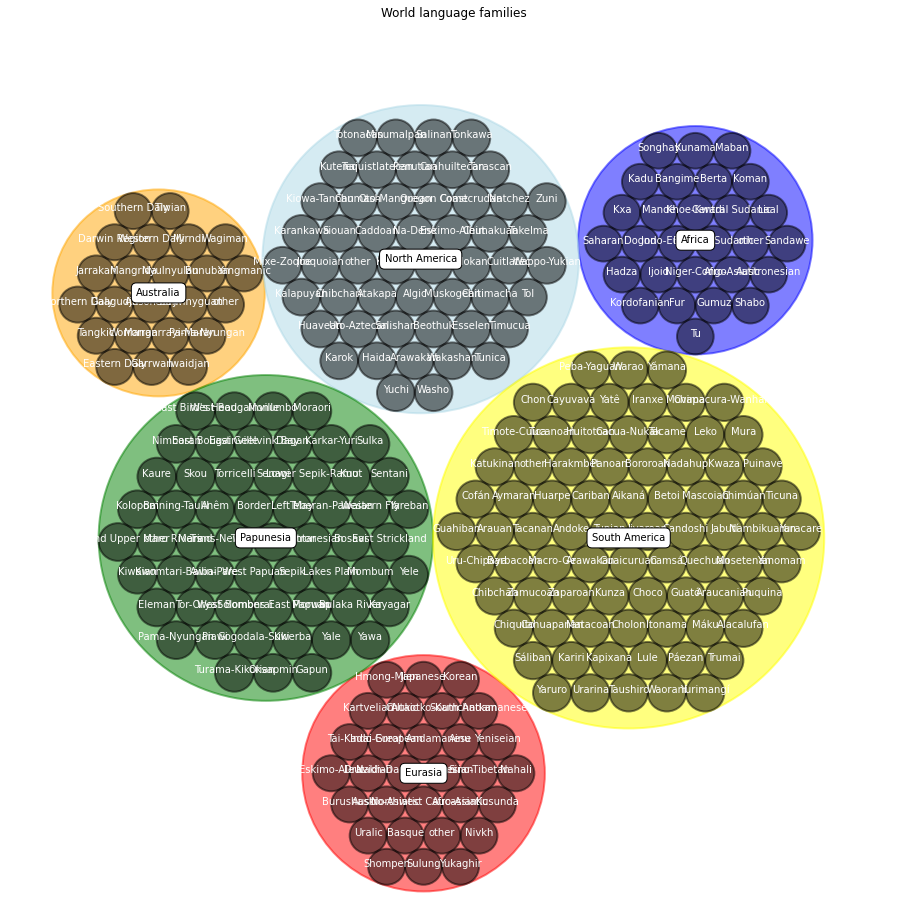

In [26]:
fig, ax = plt.subplots(figsize=(16,16))

ax.set_title('World language families')

ax.axis('off')
lim = max(
    max(
        abs(circle.x) + circle.r,
        abs(circle.y) + circle.r,
    )
    for circle in circles
)
plt.xlim(-lim, lim)
plt.ylim(-lim, lim)

for circle in circles:
    if circle.level != 2:
      continue
    x, y, r = circle
    ax.add_patch( plt.Circle((x, y), r, alpha=0.5, linewidth=2, color=get_colour(circle.ex["id"])))

# Print circle and labels for the highest level:
for circle in circles:
    if circle.level != 3:
      continue
    x, y, r = circle
    label = circle.ex["id"]
    ax.add_patch( plt.Circle((x, y), r, alpha=0.5, linewidth=2, color="black"))
    plt.annotate(label, (x,y ), ha='center', color="white")

# Print labels for the continents
for circle in circles:
    if circle.level != 2:
      continue
    x, y, r = circle
    label = circle.ex["id"]
    plt.annotate(label, (x,y ) ,va='center', ha='center', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round', pad=.5))



Ця візуалізація - мапа мовних сімей світу. Вона демонструє, на якій мікротериторії найбільше/найменше мовних сімей і перелічує їх.

Якщо залишу цю візуалізацію в фінальному варіанті, планую зробити, щоб назви сімей не відображались так, як зараз(можливо, щоб відображались при наведенні мишки, або зробити менший шрифт назв)

In [27]:
Australia = set(au_g_list.flatten())
Eurasia = set(ea_g_list.flatten())
Africa = set(a_g_list.flatten())
South_America = set(sa_g_list.flatten())
North_America = set(na_g_list.flatten())
Papunesia = set(p_g_list.flatten())


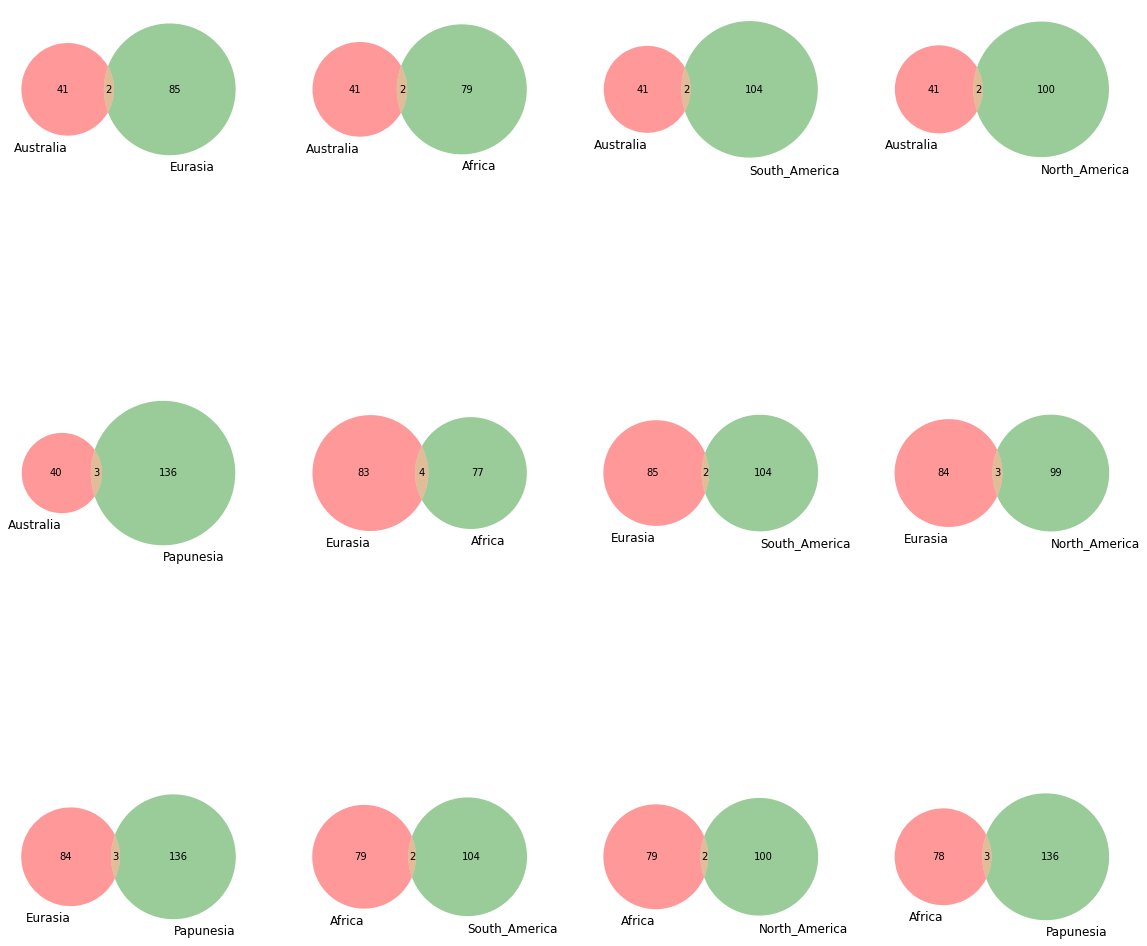

In [28]:

figure, axes = plt.subplots(3, 4, figsize=(20,20))
ax.set_title('Relationship of language genuses between microareas')

v1 = venn2([Australia, Eurasia], set_labels = ('Australia', 'Eurasia'),  ax=axes[0][0])
v2 = venn2([Australia, Africa], set_labels = ('Australia', 'Africa'),  ax=axes[0][1])
v3 = venn2([Australia, South_America], set_labels = ('Australia', 'South_America'),  ax=axes[0][2])
v4 = venn2([Australia, North_America], set_labels = ('Australia', 'North_America'),  ax=axes[0][3])
v5 = venn2([Australia, Papunesia], set_labels = ('Australia', 'Papunesia'),  ax=axes[1][0])

v6 = venn2([Eurasia, Africa], set_labels = ('Eurasia', 'Africa'),  ax=axes[1][1])
v7 = venn2([Eurasia, South_America], set_labels = ('Eurasia', 'South_America'),  ax=axes[1][2])
v8 = venn2([Eurasia, North_America], set_labels = ('Eurasia', 'North_America'),  ax=axes[1][3])
v9 = venn2([Eurasia, Papunesia], set_labels = ('Eurasia', 'Papunesia'),  ax=axes[2][0])

v10 = venn2([Africa, South_America], set_labels = ('Africa', 'South_America'),  ax=axes[2][1])
v11 = venn2([Africa, North_America], set_labels = ('Africa', 'North_America'),  ax=axes[2][2])
v12 = venn2([Africa, Papunesia], set_labels = ('Africa', 'Papunesia'),  ax=axes[2][3])

# v13 = venn2([South_America, North_America], set_labels = ('South_America', 'North_America'))
# v13 = venn2([South_America, Papunesia], set_labels = ('South_America', 'Papunesia'))

plt.show()

Я хотіла подивитись на походження і розповсюдження мовних родин/родів, щоб зрозуміти наскільки мовний рід росходиться за межами своєї певної території. Тобто якщо "джерелом" мовного роду є Африка, то наскільки через різні причини(велике переселення народів, міграції і тд) цей рід розповсюдився на інші території.

З цієї візуалізації можна побачити, що  перетини кіл дуже маленькі, тобто мала кількість мовних родів присутня більше ніж на 1 мікротериторії. З цього можна зробити висновок, що більшість родів залишилися на "своїй території". Найбільші перетини з іншими мікротериторіями(3-4 роди) має Євразія, що досить логічно, враховуючи, що саме народи, які живуть цих територіях були найбільш загарбницькими і в свій час робити багато відкриттів нових земель і мали багато колоній там.

Планую зробити кольори кілець відповідно до мікротериторії.

In [29]:
languages_background = languages_background_full[languages_background_full.macroarea == 'Eurasia']
languages_background

,language_name,language_family,language_genus,macroarea
5,Arabic (Beirut),Afro-Asiatic,Semitic,Eurasia
6,Arabic (Bahrain),Afro-Asiatic,Semitic,Eurasia
8,Abkhaz,Northwest Caucasian,Northwest Caucasian,Eurasia
15,Abaza,Northwest Caucasian,Northwest Caucasian,Eurasia
16,Acehnese,Austronesian,Malayo-Sumbawan,Eurasia
...,...,...,...,...
2642,Yupik (Siberian),Eskimo-Aleut,Eskimo,Eurasia
2648,Yazva,Uralic,Permic,Eurasia
2658,Zazaki,Indo-European,Iranian,Eurasia
2662,Zhang-Zhung,Sino-Tibetan,Bodic,Eurasia


In [30]:
for_donat_fam = languages_background.groupby('language_family').count()
for_donat_fam['family'] = for_donat_fam.index

for_donat_gen = languages_background.groupby('language_genus').count()
for_donat_gen['genus'] = for_donat_gen.index

In [31]:
background_chart = alt.Chart(for_donat_fam).mark_bar().encode(
    x = alt.X('family:N', sort= alt.SortField('language_name', order='descending')),
    y = alt.Y('language_name:Q'),
    color = alt.Color('family:N'),
).transform_window(
    rank='rank(language_name)',
    sort=[alt.SortField('language_name', order='descending')]
).transform_filter(
    (alt.datum.rank < 10)
).properties(width = 700, height = 500)
background_chart

alt.Chart(...)

In [32]:
background_chart = alt.Chart(for_donat_gen).mark_bar().encode(
    x = alt.X('genus:N', sort= alt.SortField('language_name', order='descending')),
    y = alt.Y('language_name'),
    color = alt.Color('genus:N'),
).transform_window(
    rank='rank(language_name)',
    sort=[alt.SortField('language_name', order='descending')]
).transform_filter(
    (alt.datum.rank < 10)
).properties(width = 700, height = 500)
background_chart

alt.Chart(...)

Ці дві візуалізації я поки зробила лише для Євразії, але планую зробити для всіх мікротериторій.

Візуалізація - топ10 найпоширеніших мовних родин і найпоширеніших топ10 мовних родів на мікротериторії. 
Вона також показує кількість мов, які входять до цієї родини/роду на цій території(що, як я згадувала раніше,показує, що з однієї мовної сім'ї можуть виходити багато мов). 

In [33]:

alt.Chart(languages_background).mark_circle().encode(
    y='language_family:N',
    x='language_genus:N',
    size='count()'
).properties(width = 800, height = 500)

alt.Chart(...)

На цій візуалізації я хотіла візуалізувати залежність між мовними родинами і мовними родами. Скільки в одній мовній родині є мовних родів і показати, яка комбінація родина+рід є "найпопулярнішою".

Але, як на мене, така  візуалізація не найкраща, тому не впевнена, чи буду давати її у фінальний варіант.
Також пробувала візуалізувати за допомогою heatmap, але, на мою думку, так ще гірше.